In [105]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
import pdf2image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [107]:
def imshow(img, figsize=(10, 10), **kwargs):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.axis('off')
    ax.imshow(img, **kwargs)

In [108]:
img = cv2.imread('./images/image.webp')
images = []
images.append(img)

In [109]:
image = np.array(images[0])

# Stamp detection

In [110]:
from stamp_processing import StampDetector

In [111]:
# Set path to None to download weight
detector = StampDetector(model_path=None)

INFO - Downloading stamp detection weight from google drive'
File exists: tmp\stamp_detector.pt
INFO - Finished downloading. Weight is saved at tmp\stamp_detector.pt'


Adding autoShape... 
Using cpu for stamp detection


In [112]:
preds = detector([image])

In [113]:
for box in preds[0]:
    cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 0, 255), 2)

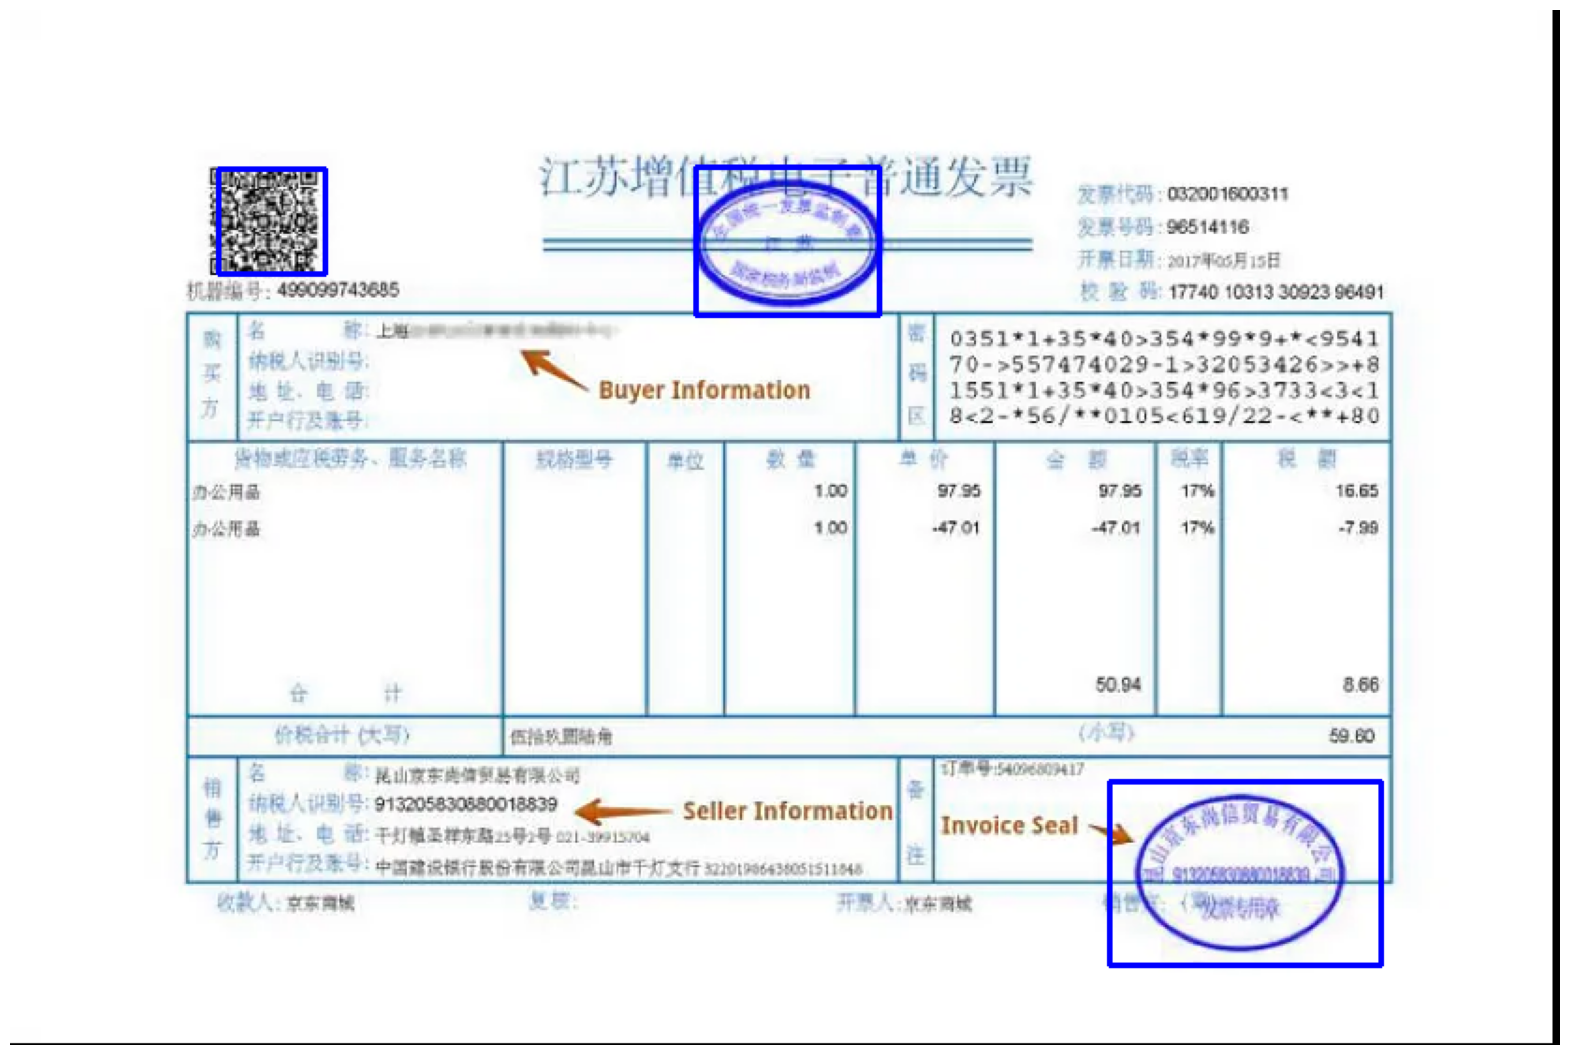

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.axis('off')
ax.imshow(image)

# Stamp removal

In [115]:
from stamp_processing import StampRemover

In [116]:
image = np.array(images[0])

In [117]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath
#Set weight path to None to downlaod weight
remover = StampRemover(detection_weight=None, removal_weight=None)

INFO - Downloading stamp remover weight from google drive'
File exists: tmp\stamp_remover.pkl
INFO - Finished downloading. Weight is saved at tmp\stamp_remover.pkl'
INFO - Downloading stamp detection weight from google drive'
File exists: tmp\stamp_detector.pt
INFO - Finished downloading. Weight is saved at tmp\stamp_detector.pt'


Adding autoShape... 
Using cpu for stamp detection


In [118]:
preds = remover([image])

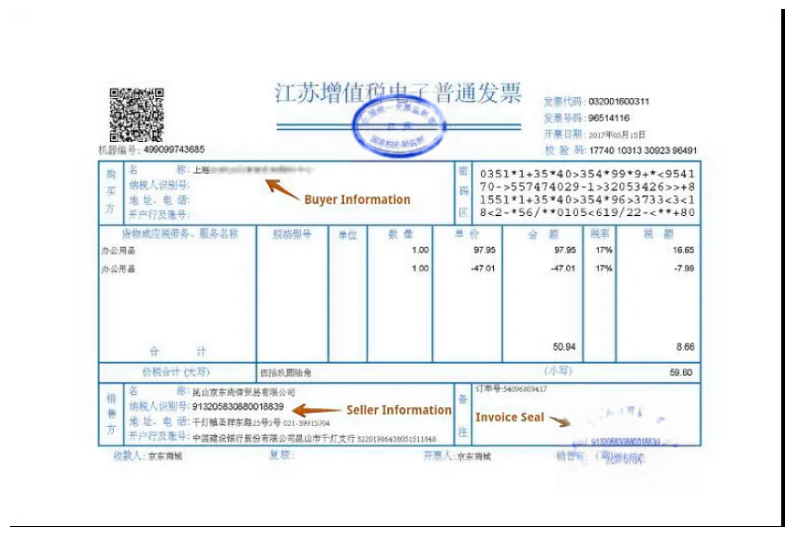

In [119]:
imshow(preds[0])